In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [34]:
cl_no = 3
hid_size1 = 4
hid_size2 = 3

In [44]:
class NN:
    
    def __init__(self,inp_size,hidden_layer1,op_size):
        
        #self.w1 = np.random.randn(inp_size,hidden_layer1)*np.sqrt(2/(inp_size+hidden_layer1))
        self.w1 = np.zeros((inp_size,hidden_layer1))
        #print(self.w1)
        
        self.b1 = np.zeros((1,hidden_layer1))
        
        #self.w2 = np.random.randn(hidden_layer1,op_size)*np.sqrt(2/(hidden_layer1+op_size))
        self.w2 = np.zeros((hidden_layer1,op_size))
        self.b2 = np.zeros((1,op_size))
        
    
    def FeedForward(self, x_in, y_true, train, func, learning_rate = 0.0001):
        
        mid1 = np.dot(x_in,self.w1) + self.b1
        
        #print('m1',mid1)
        
        if func == 'sigmoid':
                 
            a1 = sigmoid(mid1)
        
        else:
            
            a1 = soft_RELU(mid1)
        
        #print('a1',a1)
        
        mid2 = np.dot(a1,self.w2) + self.b2
        
        a2 = softmax(mid2)
        
        if (train == 1):
            
            dL_w2 = np.dot(np.transpose(a1),(a2-y_true))
            
            dL_b2 = np.sum(a2-y_true,axis=0)
            
            dL_w1_half = np.dot((a2-y_true),np.transpose(self.w2))
            
            if func == 'sigmoid':
            
                dL_w1_sec_half = np.multiply(a1,(1-a1))
                
            elif func == 'relu':
                
                #dL_w1_sec_half = np.divide(np.exp(-mid1),(1+np.exp(-mid1)))
                dL_w1_sec_half = elu_diff(mid1)
            
            dL_w1 = np.dot(np.transpose(x_in),np.multiply(dL_w1_half, dL_w1_sec_half))
            
            dL_b1 = np.sum(np.multiply(dL_w1_half, dL_w1_sec_half), axis=0)
            
            
            self.w1 += -1*learning_rate*dL_w1
            
            self.b1 += -1*learning_rate*dL_b1
            
            self.w2 += -1*learning_rate*dL_w2
            
            self.b2 += -1*learning_rate*dL_b2
            
             
        Loss = Cross_entropy(a2,y_true)
        
        #Acc = calc_acc(a2,y_true)
        
        return (a2, Loss)
    
    
    
        
        
    

In [45]:
train_data = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/train3_data.csv', header = None)
train_label = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/train3_label.csv', header = None)

In [46]:
def hot_encode(y_true,cl_no):
    
    hotcode = np.zeros((np.shape(y_true)[0],cl_no))
    
    for i in range(np.shape(y_true)[0]):
        hotcode[i,y_true[i]-1] = 1
    
    return hotcode

# def elu_diff(mid):
#     out = np.ones(np.shape(mid))
#     for i in mid:
#         id0 = np.where(i<0)
#         out[i,id0] = 
    

def sigmoid(x):
        return (1 / (1 + np.exp(-x)))
    
def soft_RELU(x):
    
    return (np.log(1+np.exp(-x)))
    
def softmax(x):
    e_x = np.exp(x - np.reshape(np.amax(x,axis=1),(np.shape(x)[0],1)))
    div = np.sum(e_x,axis=1)
    for i in range(np.shape(x)[1]):
        e_x[:,i] = np.divide(e_x[:,i],div)
    return e_x

def Cross_entropy(a2,y_true):
        
    loss = np.mean((-1)*np.multiply(y_true,np.log(a2)),axis=1)
        
    return loss

def norm(x_in):
    for i in range(2):
        
        x_in[:,i] = x_in[:,i]/max(np.abs(x_in[:,i]))
    return x_in

def calc_acc(pred,true):
    pred_ind = [[np.where(i == max(i))] for i in pred ]
    true_ind = [[np.where(i == max(i))] for i in true ]
    count = 0
    for i in range(np.shape(pred)[0]):
        if pred_ind[i] == true_ind[i]:
            count += 1
    accuracy = count/float(np.shape(pred)[0])
    return accuracy*100

In [47]:
x_in = np.transpose(train_data.to_numpy())
x_in = norm(x_in)
y_true=np.transpose(train_label.to_numpy())

y_true_hot = hot_encode(y_true,cl_no)

In [54]:
p1 = NN(inp_size=np.shape(x_in)[1],hidden_layer1 = 4, op_size = cl_no)

final_loss = []
final_acc  = []

for i in range(500):
    out, Loss= p1.FeedForward(x_in, y_true_hot, train=1, func='sigmoid', learning_rate=0.001)
    final_loss.append(np.mean(Loss))
    #final_acc.append(acc)
#final_loss = [1.2]*500

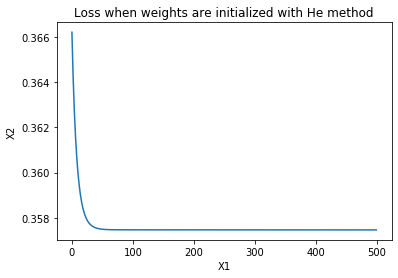

In [56]:
plt.plot(final_loss)
plt.xlabel('X1')
plt.ylabel('X2')
N = 3
plt.title('Loss when weights are initialized with He method')
#plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
plt.show()
plt.show()

In [167]:
out

array([[0.22911582, 0.39530071, 0.37558347],
       [0.22919039, 0.39423835, 0.37657127],
       [0.22911125, 0.39428757, 0.37660118],
       [0.22231887, 0.42318142, 0.35449971],
       [0.23103443, 0.39297301, 0.37599256],
       [0.22891293, 0.39280388, 0.37828319],
       [0.22974361, 0.40204841, 0.36820798],
       [0.22925735, 0.3953178 , 0.37542485],
       [0.23010485, 0.39636112, 0.37353404],
       [0.22859654, 0.39229241, 0.37911105],
       [0.23042622, 0.39259602, 0.37697776],
       [0.2290487 , 0.39345593, 0.37749537],
       [0.2252377 , 0.40020515, 0.37455715],
       [0.22591632, 0.39284202, 0.38124166],
       [0.22454443, 0.38303727, 0.39241829],
       [0.23261276, 0.42150254, 0.34588471],
       [0.23053097, 0.39765204, 0.37181699],
       [0.22829863, 0.39206313, 0.37963824],
       [0.22959402, 0.3903602 , 0.38004578],
       [0.23043818, 0.40040863, 0.36915319],
       [0.22913882, 0.39396282, 0.37689836],
       [0.22398736, 0.37929236, 0.39672028],
       [0.

In [67]:
np.shape(out)

(100, 3)

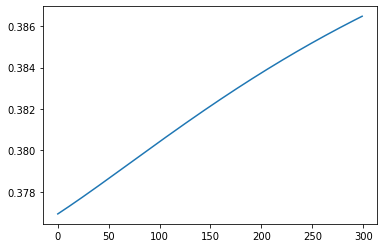

Press Enter to continue...


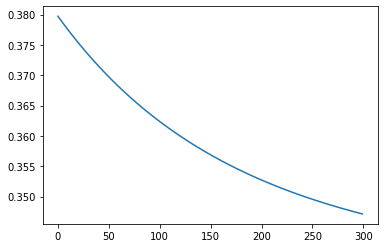

Press Enter to continue...


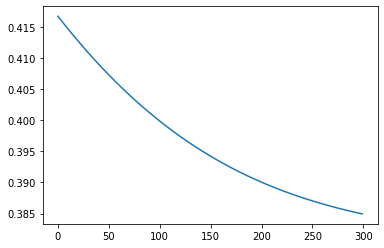

Press Enter to continue...


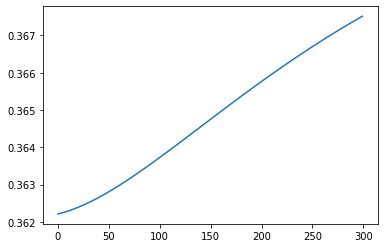

Press Enter to continue...


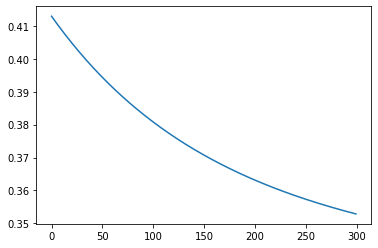

Press Enter to continue...


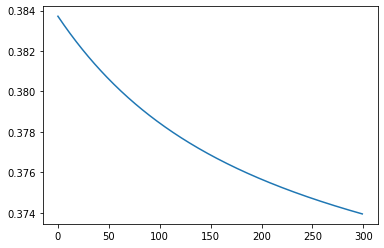

Press Enter to continue...


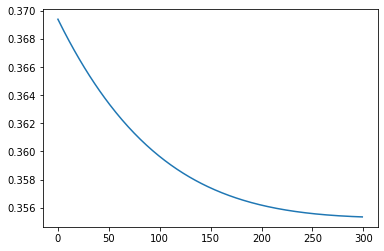

KeyboardInterrupt: 

In [161]:
N = 100
k = 10

cl_no = 3


for act in ['relu','sigmoid']:
    
    loss_per_hid_size = []
    trial = 0
    
    for hid_size1 in [1,2,3,4,5,6,7,8,9,10]:

        avg_loss_per_fold = []
        
        for fold in range(k):
            validate_data = x_in[fold*(N//k):(fold+1)*(N//k),:]
            train_data = np.concatenate((x_in[:fold*(N//k),:], x_in[(fold+1)*(N//k):,:]), axis = 0)

            validate_label = y_true_hot[fold*(N//k):(fold+1)*(N//k),:]
            train_label = np.concatenate((y_true_hot[:fold*(N//k),:], y_true_hot[(fold+1)*(N//k):,:]), axis = 0)

            p1 = NN(inp_size=np.shape(x_in)[1],hidden_layer1 = hid_size1, op_size = cl_no)

            final_loss = []
            
            final_acc = []

            for i in range(300):
                out, Loss,acc = p1.FeedForward(train_data, train_label, train=1, func=act, learning_rate=0.0001)
                test_out, validation_Loss, acc = p1.FeedForward(validate_data, validate_label, train=0, func=act, learning_rate=0.0001)
                final_loss.append(np.mean(validation_Loss))
                final_acc.append(acc)
                
            #accuracy = 
            #print(np.shape(out),np.shape(test_out))
            
            plt.plot(final_loss)
            plt.show()
            
            input("Press Enter to continue...")

            avg_loss_per_fold.append(np.min(final_loss))
        
        loss_per_hid_size.append(np.mean(avg_loss_per_fold))
        
        print('Loss for ',act,' activation function with hidden nodes = ',hid_size1,' is ',loss_per_hid_size[trial])
        trial += 1
        
    print(loss_per_hid_size.index(min(loss_per_hid_size)))


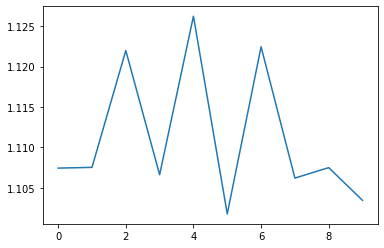

In [39]:
plt.plot(avg_loss_per_fold)
plt.show()